# AIML Lab Assignment 8
> **Objective** : KNN, SVM & Decision Tree

> **Name** : Pranav Sharma

> **SID** : 22103018

#### Preparing the dataset

In [5]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Checking for null values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Normalizing the data
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [9]:
# Separating the output values
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#### 1. Applying KNN

In [20]:
# Train the model and find scores for different k
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

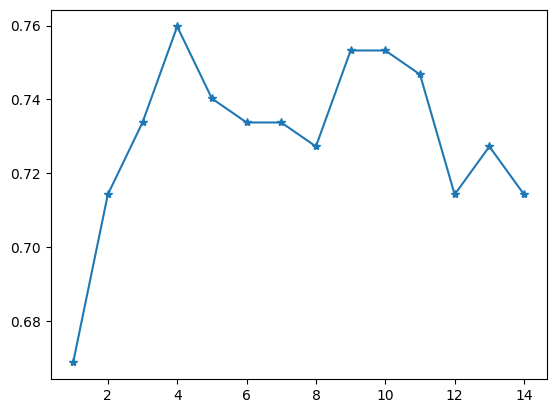

In [21]:
# Plotting to find the best value for k for test scores
plt.figure()
plt.plot(range(1,15), test_scores, marker='*', label='Test Score')

In [22]:
# Create KNN classification with k classes
knn = KNeighborsClassifier(4)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7597402597402597

Text(0.5, 23.52222222222222, 'Predicted label')

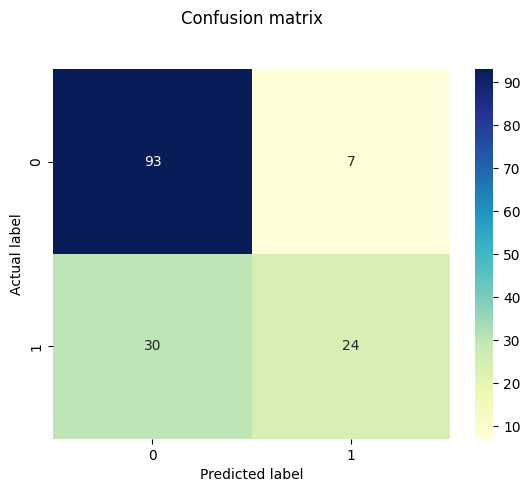

In [24]:
# Generating confusion matrix
from sklearn import metrics
import seaborn as sns
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
# Showing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       100
           1       0.77      0.44      0.56        54

    accuracy                           0.76       154
   macro avg       0.77      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154



#### 2. Applying SVM

In [29]:
# Create the SVM classification model
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [31]:
# Making predictions using the model
y_pred = SVM_classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [32]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[91  9]
 [25 29]]


In [33]:
# Getting accuracy value
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7792207792207793

In [34]:
# Generating classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.54      0.63        54

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



#### 3. Applying Decision Tree

In [37]:
# Creating the classification model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train,y_train.ravel())
y_pred = classifier.predict(X_test)

In [38]:
# Calculate accuracy of the model
metrics.accuracy_score(y_test,y_pred)

0.7597402597402597

In [39]:
# Show decision tree as text
from sklearn import tree
text_representation=tree.export_text(classifier)
print(text_representation)

|--- feature_1 <= 0.21
|   |--- feature_7 <= -0.40
|   |   |--- feature_5 <= 1.70
|   |   |   |--- class: 0
|   |   |--- feature_5 >  1.70
|   |   |   |--- class: 1
|   |--- feature_7 >  -0.40
|   |   |--- feature_5 <= -0.72
|   |   |   |--- class: 0
|   |   |--- feature_5 >  -0.72
|   |   |   |--- class: 0
|--- feature_1 >  0.21
|   |--- feature_5 <= -0.26
|   |   |--- feature_1 <= 0.77
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.77
|   |   |   |--- class: 0
|   |--- feature_5 >  -0.26
|   |   |--- feature_1 <= 1.05
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.05
|   |   |   |--- class: 1



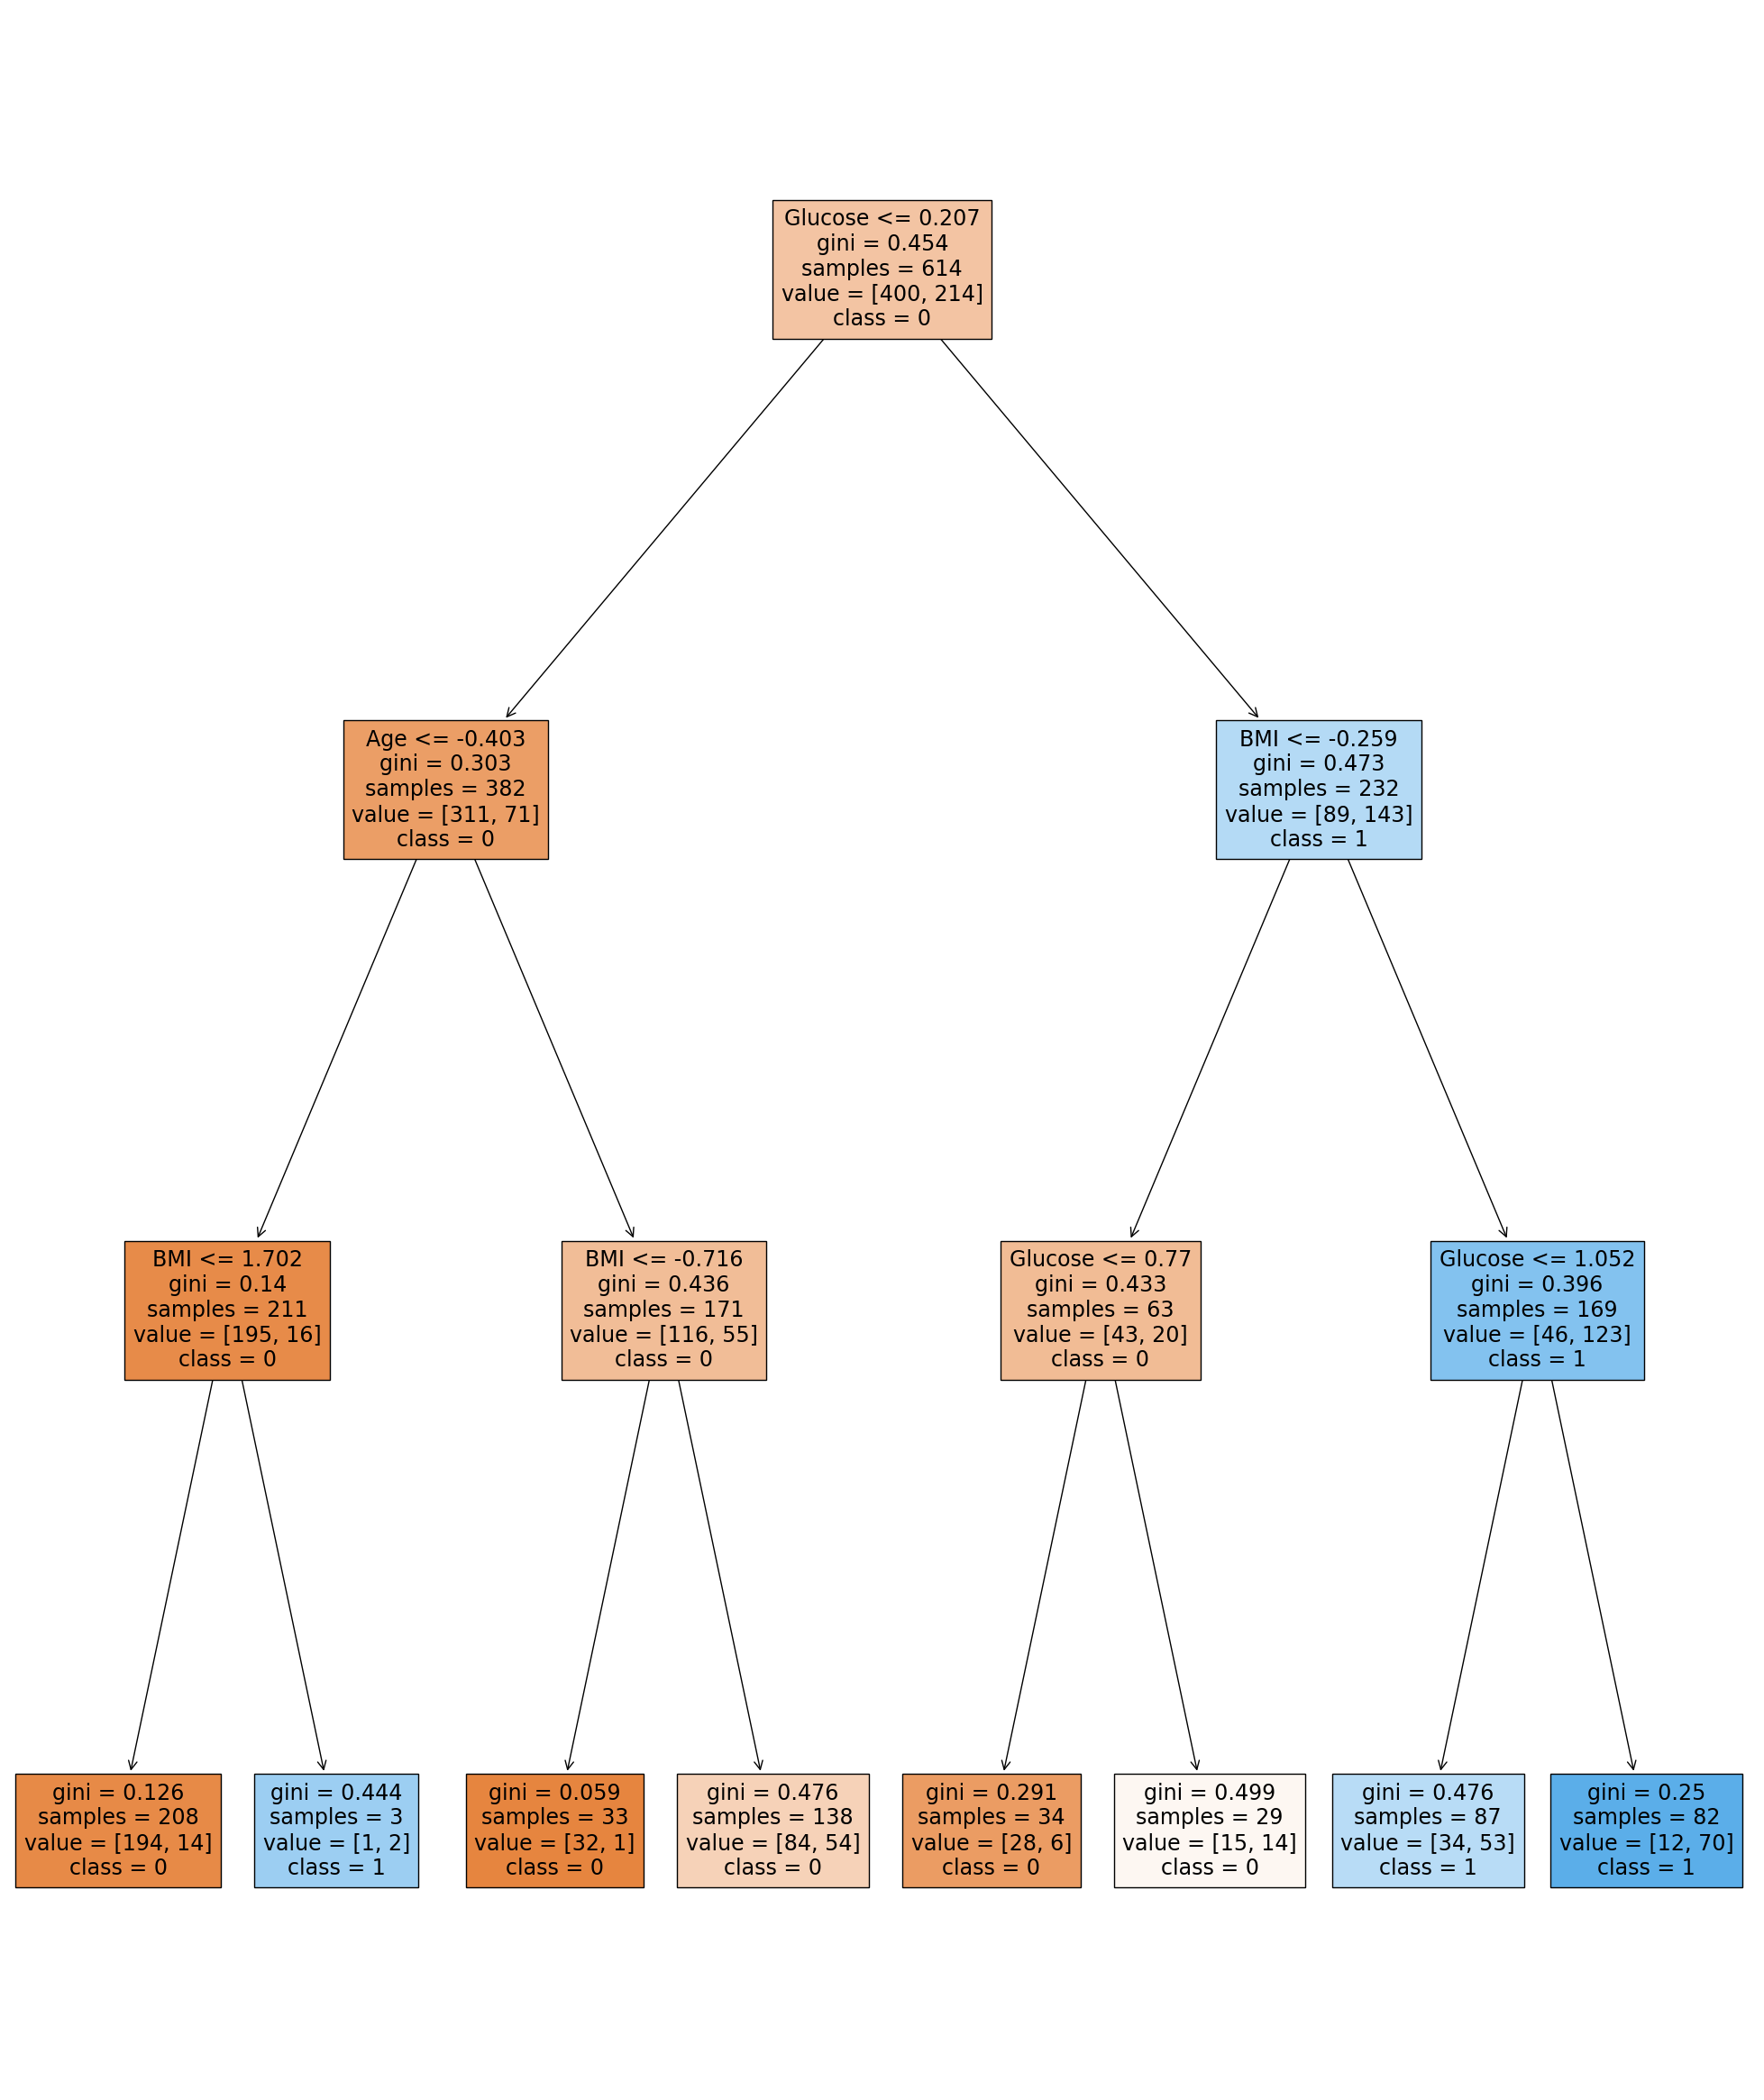

In [44]:
# Show tree in a diagram
feature_names=['Pregnencies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names=['0','1']
fig= plt.figure(figsize=(25,30))
plot = tree.plot_tree(classifier,
                     feature_names=feature_names,
                     class_names=target_names,
                     filled=True)